# Algoritmo Control de Calidad

In [2]:
%matplotlib inline
import numpy as np
import pyart
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4
import copy
import scipy.ndimage as nd
import numpy.ma as ma
import sys
import os
from radarsmn.QC.Clutter_control.clasificador import class_meteo
#from clasificador import class_meteo
from IPython.display import display, Math, Latex

### A modo de resumen una breve descripción de los algoritmos implementados para el control de calidad 

## Variables:
* $\rho_{HV}$

* V

* $\sigma({Z_{DR}})$ 


## Clases:

 * $C_1$ :Meteo 
 * $C_2$: No Meteo

## Modelos
 Una simple descripción de cada uno de los modelos. Todos basados en téncinas de clasificación supervizada.  Se modela para cada pixel la probabilidad de estar en cada una de las clases y se asigna la que tiene probabilidad mayor 



 
Modelo | Descripción
-- | --
LDA | Supone que cada una de las clases se distrbuyen como una normal multivariada. Asume que la matriz de varianzas en ambas clases es igual 
QDA | Idem a LDA pero sin asumir igualdad en la matriz de covarianzas
BN  | Supone variables independientes. Estimacion de las funciones de densidad de cada una de ellas a partir de un estimador nucleo. 
LG  | Modelo de regresion. Estima las probabilidades condicionales asumiendo que éstas se modelan a partir de una función logística

Función class_meteo

#### INPUTS
* *route* :  ruta del archivo .nc


* *sweep*: elevación 


* *model*: 'lda' para modelo LDA, 'qda' para modelo QDA. DEFAULT: 'lda'


* *graph*: TRUE para graficar PPI. DEFAULT: True


* *names*: lista con el nombre de las variables en orden:  Reflectividad, Velocidad radial,  $\rho_{hv}$,  ZDR 


#### OUTPUTS

c=numpy.ma.core.MaskedArray
$$
  \left\lbrace
  \begin{array}{l}
     c = 1 \text{ meteo} \\
     c = 0 \text{ no meteo} \\
     c = 2 \text{ NAN } \\
  \end{array}
  \right.
$$


Los valos True de la mascara corresponden a los lugares donde no hay dato de reflectividad


Ejemplo

/home/sofia/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full([361, 480], 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/home/sofia/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/sofia/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


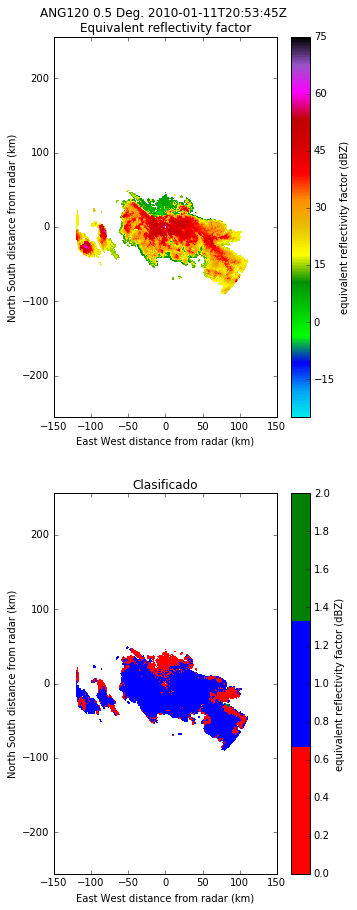

In [3]:
sweep=0
ruta= '/home/sofia/RadarMeteo/datos/cfrad.20100111_205345.000_to_20100111_205722.000_ANG120_v126_SUR.nc'
c=class_meteo(ruta,sweep,names=['dBZ','V','RhoHV','ZDR'],graph=True,model='lda')


/home/sofia/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full([360, 493], 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


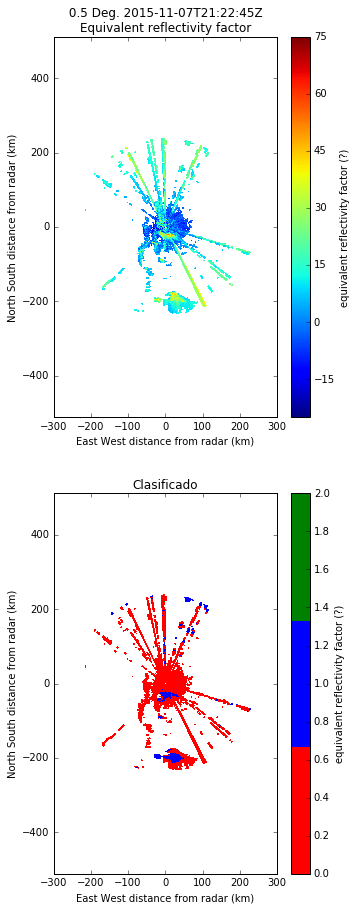

In [4]:
sweep=0
ruta='/home/sofia/proyecto/Algoritmo_QC/prueba_cba.nc'
radar=pyart.io.read(ruta)
radar.fields.keys()

c=class_meteo(ruta,sweep,names=['TH','VRAD','RHOHV','ZDR'],graph=True)